In [24]:
import kagglehub
from sympy.printing.tensorflow import tensorflow
from tomlkit import document

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\amitt\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [25]:
import pandas as pd

books = pd.read_csv(f"{path}/books.csv")

In [26]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

#### To visualize the missing values, we use .isna().transpose()

In [29]:
books.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809
isbn13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
isbn10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
subtitle,True,False,True,True,True,True,True,False,False,True,...,True,True,True,True,True,False,True,True,True,False
authors,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
categories,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
thumbnail,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
description,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
published_year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
average_rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

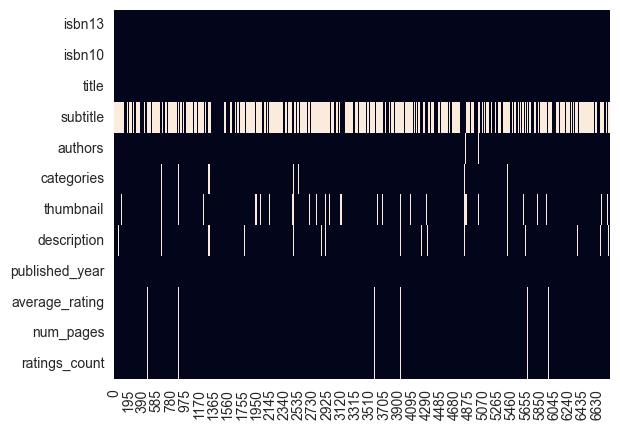

In [30]:
sns.heatmap(books.isna().transpose(), cbar=False)

#### Checking the missing values

In [31]:
import numpy as np

In [32]:
books["missing descriptions"] = np.where(books["description"].isna(),1,0)

In [33]:
books["age_of_book"] = 2025 - books["published_year"]

In [34]:
columns_of_interest = ["num_pages","age_of_book","missing descriptions","average_rating"]

In [35]:
books[columns_of_interest].head()

,num_pages,age_of_book,missing descriptions,average_rating
0,247.0,21.0,0,3.85
1,241.0,25.0,0,3.83
2,479.0,43.0,0,3.97
3,512.0,32.0,0,3.93
4,170.0,23.0,0,4.15


Spearman coreelation when dealing with fields that are binary (non continuous values) like missing_description oterwise use pearson

In [36]:
books[columns_of_interest].corr(method="pearson")

,num_pages,age_of_book,missing descriptions,average_rating
num_pages,1.000000,0.002641,0.036397,0.200153
age_of_book,0.002641,1.000000,0.178070,0.064344
missing descriptions,0.036397,0.178070,1.000000,0.007713
average_rating,0.200153,0.064344,0.007713,1.000000


In [37]:
matrix = books[columns_of_interest].corr(method="spearman")

<Axes: >

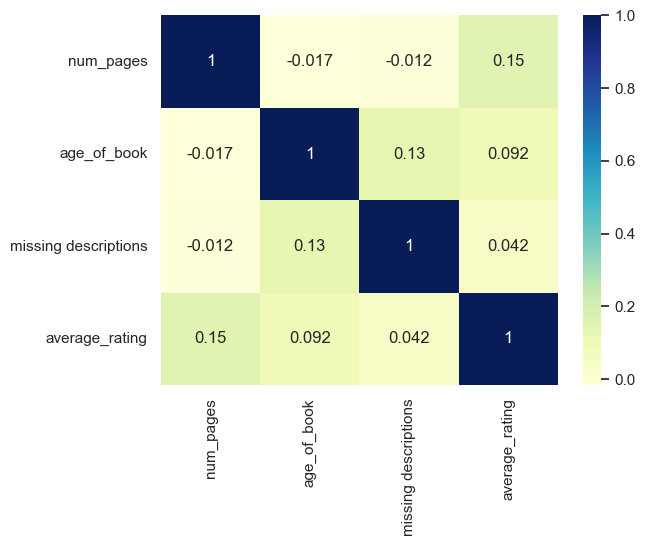

In [38]:
sns.set_theme(style="whitegrid")

sns.heatmap(matrix, cmap="YlGnBu",annot=True)

There is small number of observations and there is no pattern on the missingness,


In [39]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing descriptions', 'age_of_book'],
      dtype='object')

#### remove certain books based on the folling missing values in certain columns This filters the books DataFrame to include only the rows where all four columns have non-null values.

In [40]:
books_needed = books[~(books["description"].isna()) &
     ~(books["published_year"].isna())  &
      ~(books["average_rating"].isna()) &
      ~(books["num_pages"].isna())
    ]

In [41]:
books_needed.shape

(6507, 14)

In [42]:
books_needed.shape

(6507, 14)

In [43]:
books_needed

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [44]:
books_needed["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


### Remove descriptions that are of less words

In [45]:
books_needed["words_in_description"] = books_needed["description"].str.split().str.len()

C:\Users\amitt\AppData\Local\Temp\ipykernel_27072\74372773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_needed["words_in_description"] = books_needed["description"].str.split().str.len()


#### Graph of the frequnecy of word count

In [46]:
books_needed

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


In [47]:
books_needed["description"][books_needed["words_in_description"].between(1,6)]

6                                             Donation.
11                                       Fantasy-roman.
77                       Nonsense rhyming story. 4 yrs+
104                      Library of Liberal Arts title.
682                    Biography of John Wesley Powell.
                             ...                       
6695                                 No Marketing Blurb
6704    Accessible and affordable illustrated biography
6721                                            Horror.
6757                        Audio Book- unabriged on CD
6794                               源氏物語54帖、「宮田切り絵」の真骨頂。
Name: description, Length: 78, dtype: object

#### Getting word count between 5 and 14

In [48]:
books_needed["description"][books_needed["words_in_description"].between(5,14)]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [49]:
books_needed["description"][books_needed["words_in_description"].between(20,35)]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
36      A magical and fantastic collection of early st...
                              ...                        
6779    Edited by the creator and executive producer o...
6782    Displays one of America's leading physicist's ...
6789    Provides an introduction to the American artis...
6799    This book is the story of a young girl obsesse...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1868, dtype: object

In [50]:
books_needed["description"][books_needed["words_in_description"].between(20,35)]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
36      A magical and fantastic collection of early st...
                              ...                        
6779    Edited by the creator and executive producer o...
6782    Displays one of America's leading physicist's ...
6789    Provides an introduction to the American artis...
6799    This book is the story of a young girl obsesse...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1868, dtype: object

In [51]:
books_needed_25_words = books_needed[~(books_needed["words_in_description"] < 18)]

In [52]:
books_needed_25_words["description"]

0       A NOVEL THAT READERS and critics have been eag...
1       A new 'Christie for Christmas' -- a full-lengt...
3       A memorable, mesmerizing heroine Jennifer -- b...
4       Lewis' work on the nature of love divides love...
5       "In The Problem of Pain, C.S. Lewis, one of th...
                              ...                        
6803    This book tells the tale of a man who goes on ...
6804    Wisdom to Create a Life of Passion, Purpose, a...
6805    This collection of the timeless teachings of o...
6808    Since the three volume edition ofHegel's Philo...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 5883, dtype: object

#### The np condition where if the subtitle is na then fill it with title or add both title and : subtitle together

In [53]:
books_needed_25_words["title_and_subtitle"] = np.where(books_needed_25_words["subtitle"].isna(),books_needed_25_words["title"],
         books_needed_25_words["title"] + ": " + books_needed_25_words["subtitle"])

C:\Users\amitt\AppData\Local\Temp\ipykernel_27072\3334478638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_needed_25_words["title_and_subtitle"] = np.where(books_needed_25_words["subtitle"].isna(),books_needed_25_words["title"],


In [54]:
min(books_needed_25_words["words_in_description"])

18

In [55]:
books_needed_25_words["title_and_subtitle"]

0                                                  Gilead
1                                   Spider's Web: A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805       I Am that: Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
6809    'I'm Telling You Stories': Jeanette Winterson ...
Name: title_and_subtitle, Length: 5883, dtype: object

In [56]:
books_needed_25_words["description"]

0       A NOVEL THAT READERS and critics have been eag...
1       A new 'Christie for Christmas' -- a full-lengt...
3       A memorable, mesmerizing heroine Jennifer -- b...
4       Lewis' work on the nature of love divides love...
5       "In The Problem of Pain, C.S. Lewis, one of th...
                              ...                        
6803    This book tells the tale of a man who goes on ...
6804    Wisdom to Create a Life of Passion, Purpose, a...
6805    This collection of the timeless teachings of o...
6808    Since the three volume edition ofHegel's Philo...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 5883, dtype: object

#### Create a new description column which has a unique identifier to help build a Database

In [57]:
books_needed_25_words["tagged_description"] = books_needed_25_words["isbn13"].astype("str") + " " + books_needed_25_words["description"]

C:\Users\amitt\AppData\Local\Temp\ipykernel_27072\2638142857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_needed_25_words["tagged_description"] = books_needed_25_words["isbn13"].astype("str") + " " + books_needed_25_words["description"]


In [58]:
books_needed_25_words["tagged_description"]


0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
6809    9789042003408 This is a jubilant and rewarding...
Name: tagged_description, Length: 5883, dtype: object

In [59]:
books_needed_25_words.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing descriptions', 'age_of_book',
       'words_in_description', 'title_and_subtitle', 'tagged_description'],
      dtype='object')

In [60]:
books_needed_25_words.drop(columns=["title","subtitle","age_of_book","words_in_description"], inplace=True)

C:\Users\amitt\AppData\Local\Temp\ipykernel_27072\3906778528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_needed_25_words.drop(columns=["title","subtitle","age_of_book","words_in_description"], inplace=True)


In [61]:
books_needed_25_words.to_csv("books_cleaned.csv", index=False)

In [62]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import pandas as pd

In [63]:
from dotenv import load_dotenv

load_dotenv()

True

In [64]:
import pandas as pd

dataset = pd.read_csv("books_cleaned.csv")

In [65]:
dataset.head()

,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [66]:
dataset["isbn13"].dtype

dtype('int64')

#### Here we append tags to description, so that when get back our data from the recommender, using the id we can filter out author id, description title etc, instead of doing a one on one string match which is messy

#### save it into a text file so that it can be read using text file loader

In [67]:
dataset["tagged_description"].to_csv("tagged_description.txt",
                                     sep = "\n",
                                     index=False,
                                     header = False)

In [68]:
loader = TextLoader("tagged_description.txt", encoding="utf-8")

In [69]:
raw_documents = loader.load()

#### We make sure we split on the saperator rather on the chunk size, so we don't specify chunk size

In [70]:
text_splitter = CharacterTextSplitter(chunk_size=0,chunk_overlap=0,separator="\n")

In [71]:
documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 1168, which is longer than the specified 0
Created a chunk of size 1214, which is longer than the specified 0
Created a chunk of size 373, which is longer than the specified 0
Created a chunk of size 309, which is longer than the specified 0
Created a chunk of size 483, which is longer than the specified 0
Created a chunk of size 482, which is longer than the specified 0
Created a chunk of size 960, which is longer than the specified 0
Created a chunk of size 188, which is longer than the specified 0
Created a chunk of size 128, which is longer than the specified 0
Created a chunk of size 843, which is longer than the specified 0
Created a chunk of size 296, which is longer than the specified 0
Created a chunk of size 197, which is longer than the specified 0
Created a chunk of size 881, which is longer than the specified 0
Created a chunk of size 1088, which is longer than the specified 0
Created a chunk of size 1189, which is longer than the specified 0
Create

In [72]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [73]:
db_books = Chroma.from_documents(documents,embedding=OpenAIEmbeddings())

In [74]:
db_books

In [75]:
query = "A book to teach children about music"

In [76]:
docs_obtained = db_books.similarity_search(query,k=10)

In [77]:
int(docs_obtained[0].page_content.split(" ")[0].strip())

9781844494248

In [78]:
dataset[dataset["isbn13"] == int(docs_obtained[0].page_content.split(" ")[0].strip())]

,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,title_and_subtitle,tagged_description
5672,9781844494248,1844494241,Peter Doggett,Music,http://books.google.com/books/content?id=NZC39...,Updated and redesigned editions of the classic...,2004.0,4.0,96.0,4.0,0,Jimi Hendrix: The Complete Guide to His Music,9781844494248 Updated and redesigned editions ...


In [79]:
def retreive_semantice_recommendations(query:str, top_k:int) -> pd.DataFrame:

        recs = db_books.similarity_search(query,k=top_k)

        books_list = []

        for rec in recs:

            # '"' helps split out the quotation marks
            books_list.append(int(rec.page_content.strip('"').split(" ")[0]))

        retrieved_set = dataset[dataset["isbn13"].isin(books_list)]

        return retrieved_set

retreive_semantice_recommendations("A book on exercises",10)


,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,title_and_subtitle,tagged_description
232,9780060765316,0060765313,Michael F Roizen;Mehmet C Oz,Health & Fitness,http://books.google.com/books/content?id=WMtZ2...,Outlines steps to achieving overall physical h...,2005.0,3.82,417.0,3099.0,0,YOU: The Owner's Manual: An Insider's Guide to...,9780060765316 Outlines steps to achieving over...
1324,9780312286217,031228621X,Caroline Sharp;Elizabeth Gilbert,Language Arts & Disciplines,http://books.google.com/books/content?id=iiTfC...,Provides a series of warm-ups and practical ex...,2002.0,3.71,176.0,148.0,0,A Writer's Workbook: Daily Exercises for the W...,9780312286217 Provides a series of warm-ups an...
2809,9780486296388,0486296385,John Green;Caroline Denzler,Juvenile Nonfiction,http://books.google.com/books/content?id=p6PBk...,"Forty-two clear, accurate drawings (all in pro...",1997.0,3.64,48.0,11.0,0,Ballet Class Coloring Book,"9780486296388 Forty-two clear, accurate drawin..."
3411,9780671887179,0671887173,Stephen R. Covey,Business & Economics,http://books.google.com/books/content?id=Azod0...,Provides a daily reading program that keys on ...,1994.0,3.90,384.0,328.0,0,Daily Reflections for Highly Effective People:...,9780671887179 Provides a daily reading program...
3774,9780743250979,0743250974,Stephen R. Covey,Self-Help,http://books.google.com/books/content?id=-Evbj...,Outlining seven key organizational rules for i...,2003.0,4.22,192.0,1685.0,0,The 7 Habits of Highly Effective People Person...,9780743250979 Outlining seven key organization...
4399,9780805372762,0805372768,Elaine N. Marieb,Medical,http://books.google.com/books/content?id=CWUMA...,"""This workbook is an excellent tool for use by...",2004.0,3.94,368.0,6.0,0,Anatomy & Physiology Coloring Workbook: A Comp...,"9780805372762 ""This workbook is an excellent t..."
4835,9780935607093,0935607099,MaryAnn F. Kohl;Kim Solga;Rebecca Van Slyke,Juvenile Nonfiction,http://books.google.com/books/content?id=FnRCx...,"Featuring more than 150 activities, this guide...",1996.0,4.24,144.0,387.0,0,Discovering Great Artists: Hands-on Art for Ch...,9780935607093 Featuring more than 150 activiti...
4880,9780972018418,0972018417,Bill Phillips,Health & Fitness,http://books.google.com/books/content?id=rzqEN...,The popular fitness author explains how to ach...,2003.0,3.95,405.0,788.0,0,Eating for Life,9780972018418 The popular fitness author expla...
5319,9781570623950,1570623953,Lao-tzu;Ursula K. Le Guin;Jerome P. Seaton,Philosophy,http://books.google.com/books/content?id=c4X6x...,"A new translation of the classic ""Book of the ...",1998.0,4.32,125.0,754.0,0,Lao Tzu,9781570623950 A new translation of the classic...
5823,9781932073201,1932073205,Dan Millman,"Body, Mind & Spirit",http://books.google.com/books/content?id=NEU-1...,Presents the author's personal account of his ...,2006.0,4.14,240.0,38159.0,0,Way of the Peaceful Warrior: A Book that Chang...,9781932073201 Presents the author's personal a...


In [80]:
dataset["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2325
1,Juvenile Fiction,476
2,Biography & Autobiography,354
3,History,235
4,Literary Criticism,142
...,...,...
264,Aeneas (Legendary character),1
263,Autism,1
262,LITERARY CRITICISM,1
261,European fiction,1


In [81]:
dataset[dataset["categories"] == "Drama"]

,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing descriptions,title_and_subtitle,tagged_description
625,9780140189223,014018922X,Luigi Pirandello,Drama,http://books.google.com/books/content?id=AU4Mc...,"Accompanied by two additional plays, presents ...",1995.0,3.95,224.0,2888.0,0,Six Characters in Search of an Author and Othe...,9780140189223 Accompanied by two additional pl...
627,9780140189643,0140189645,Arthur Miller,Drama,http://books.google.com/books/content?id=y408P...,A play revealing the Salem witch trials of the...,1995.0,3.57,176.0,1297.0,0,The Crucible: A Play in Four Acts,9780140189643 A play revealing the Salem witch...
642,9780140247732,0140247734,Gerald Clifford Weales,Drama,http://books.google.com/books/content?id=ozfxn...,The tragedy of a typical American--a salesman ...,1967.0,3.50,448.0,900.0,0,Death of a Salesman,9780140247732 The tragedy of a typical America...
704,9780140437911,0140437916,George Bernard Shaw,Drama,http://books.google.com/books/content?id=9S6eV...,One of Shaw's most unusual and enduringly popu...,2003.0,3.79,160.0,5789.0,0,Saint Joan,9780140437911 One of Shaw's most unusual and e...
708,9780140440935,0140440933,Johann Goethe,Drama,http://books.google.com/books/content?id=IYSxm...,"A brief analysis of the development, style, an...",1959.0,3.73,288.0,120.0,0,Faust,9780140440935 A brief analysis of the developm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,9781585100873,1585100870,Aristophanes;Jeffrey Henderson,Drama,http://books.google.com/books/content?id=DTyrA...,English translation of Aristophanes' hilarious...,2003.0,3.42,96.0,23.0,0,Aristophanes' Acharnians,9781585100873 English translation of Aristopha...
5452,9781586638498,1586638491,William Shakespeare,Drama,http://books.google.com/books/content?id=ua7mx...,Presents the original text of Shakespeare's pl...,2003.0,3.81,224.0,438.0,0,The Tempest,9781586638498 Presents the original text of Sh...
5692,9781854596017,1854596012,Kate Atkinson,Drama,http://books.google.com/books/content?id=dUrSI...,"A play about love, death, identity and evoluti...",2000.0,3.60,96.0,78.0,0,Abandonment,"9781854596017 A play about love, death, identi..."
5799,9781904271062,1904271065,William Shakespeare;A. R. Humphreys,Drama,http://books.google.com/books/content?id=AG4h-...,A. R. Humphreyswas Professor of English at Lei...,1967.0,3.80,336.0,241.0,0,King Henry IV Part 2: Second Series,9781904271062 A. R. Humphreyswas Professor of ...


In [82]:
dataset["categories"].unique()

array(['Fiction', 'Detective and mystery stories', 'Christian life',
       'Africa, East', 'Hyland, Morn (Fictitious character)',
       'Adventure stories', 'Arthurian romances', 'Fantasy fiction', nan,
       'English drama', 'Country life', 'English fiction', 'Clergy',
       'Aubrey, Jack (Fictitious character)',
       'Detective and mystery stories, English', 'Black Death',
       'Human cloning', 'Science fiction', 'Great Britain',
       'American fiction', 'American essays', 'Capitalism', 'Ireland',
       'Juvenile Fiction', "Children's stories, English",
       'Literary Collections', 'Beresford, Tommy (Fictitious character)',
       'Imaginary wars and battles', 'Dysfunctional families',
       'Poirot, Hercule (Fictitious character)', 'Christmas stories',
       'Marple, Jane (Fictitious character)', 'Belgians',
       'Battle, Superintendent (Fictitious character)',
       'Baggins, Frodo (Fictitious character)', 'Cambridge (Mass.)',
       'Business enterprises', 'Emoti

In [83]:
simple_category_mapping = {
    # Fiction
    "Fiction": "Fiction",
    "Detective and mystery stories": "Fiction",
    "Adventure stories": "Fiction",
    "Fantasy fiction": "Fiction",
    "Science fiction": "Fiction",
    "Historical fiction": "Fiction",
    "Horror tales": "Fiction",
    "Romance": "Fiction",
    "Humorous stories": "Fiction",
    "Children's stories": "Fiction",
    "Fairy tales": "Fiction",
    "Ghost stories": "Fiction",
    "War": "Fiction",
    "Dystopias": "Fiction",
    "Mythology": "Fiction",

    # Non-fiction
    "History": "Non-fiction",
    "Biography & Autobiography": "Non-fiction",
    "Science": "Non-fiction",
    "Psychology": "Non-fiction",
    "Religion": "Non-fiction",
    "Travel": "Non-fiction",
    "Health & Fitness": "Non-fiction",
    "Business & Economics": "Non-fiction",
    "Politics": "Non-fiction",
    "Self-Help": "Non-fiction",
    "Philosophy": "Non-fiction",
    "True Crime": "Non-fiction",
    "Education": "Non-fiction",
    "Technology & Engineering": "Non-fiction",

    # Specific Categories (retained)
    "Meditation": "Meditation",
    "Gardening": "Gardening",
    "Cooking": "Cooking",
    "Photography": "Photography",
    "Music": "Music",
    "Art": "Art",
    "Sports & Recreation": "Sports & Recreation",
    "Games & Activities": "Games & Activities",
    "Crafts & Hobbies": "Crafts & Hobbies",
    "Language & Linguistics": "Language & Linguistics",
    "Animals": "Animals",
    "Nature": "Nature",
    "Travel": "Travel",
    "Parenting": "Parenting",
    "Relationships": "Relationships"
}

In [84]:
dataset["simple_category_mapping"] = dataset["categories"].map(simple_category_mapping)

In [127]:
dataset["simple_category_mapping"].unique()

array(['Fiction', nan, 'Non-fiction', 'Sports & Recreation', 'Travel',
       'Music', 'Nature', 'Art', 'Photography', 'Cooking', 'Gardening',
       'Games & Activities', 'Crafts & Hobbies', 'Animals', 'Meditation'],
      dtype=object)

In [157]:
categories = list(dataset["simple_category_mapping"].unique())

categories

['Fiction',
 nan,
 'Non-fiction',
 'Sports & Recreation',
 'Travel',
 'Music',
 'Nature',
 'Art',
 'Photography',
 'Cooking',
 'Gardening',
 'Games & Activities',
 'Crafts & Hobbies',
 'Animals',
 'Meditation']

In [87]:
import torch

#### Pip install tf-keras if needed

In [88]:
print(torch.__version__)

2.6.0+cpu


In [96]:
categories

['Fiction',
 nan,
 'Non-fiction',
 'Sports & Recreation',
 'Travel',
 'Music',
 'Nature',
 'Art',
 'Photography',
 'Cooking',
 'Gardening',
 'Games & Activities',
 'Crafts & Hobbies',
 'Animals',
 'Meditation']

In [135]:
text = dataset.loc[dataset["simple_category_mapping"]=="Gardening","description"].reset_index(drop=True)[0]

In [ ]:
from transformers import pipeline

In [139]:
pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [162]:
def generate_predictions_categories(sequence,categories):

    predictions = pipe(sequence, candidate_labels=categories)

    index = np.argmax(predictions["scores"])

    label = predictions["labels"][index]

    return label

text = dataset.loc[dataset["simple_category_mapping"]=="Gardening","description"].reset_index(drop=True)[3]

generate_predictions_categories(text,categories)

'Gardening'

In [144]:
from tqdm import tqdm

In [159]:
categories.remove(categories[1])
categories

['Fiction',
 'Sports & Recreation',
 'Travel',
 'Music',
 'Nature',
 'Art',
 'Photography',
 'Cooking',
 'Gardening',
 'Games & Activities',
 'Crafts & Hobbies',
 'Animals',
 'Meditation']

In [163]:
actual_cats = []
predicted_cats = []

for i in tqdm(range(0,15)):

    sequence = dataset.loc[dataset["simple_category_mapping"]=="Fiction","description"].reset_index(drop=True)[i]

    predicted_cats += [generate_predictions_categories(sequence, categories=categories)]
    actual_cats += ["Fiction"]

100%|██████████| 15/15 [00:57<00:00,  3.81s/it]


In [183]:
isbn = []
predicted_cats = []

In [184]:
missing_cats = dataset.loc[dataset["simple_category_mapping"].isna(),["isbn13","description"]].reset_index(drop=True)

In [185]:
for i in tqdm(range(0,30)):

    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions_categories(sequence, categories=categories)]
    isbn += [missing_cats["isbn13"][i]]

100%|██████████| 30/30 [01:43<00:00,  3.45s/it]


In [189]:
missing_pred_df = pd.DataFrame({"isbn13":isbn, "predicted_categories":predicted_cats })

In [190]:
missing_pred_df

,isbn13,predicted_categories
0,9780006280897,Nature
1,9780006280934,Travel
2,9780006380832,Travel
3,9780006470229,Fiction
4,9780006483014,Travel
5,9780006486145,Travel
6,9780006490456,Art
7,9780006496434,Fiction
8,9780006496878,Travel
9,9780006496892,Travel


In [195]:
dataset = pd.merge(dataset,missing_pred_df,on="isbn13",how="left")

In [196]:
dataset["simple_category_mapping"] = np.where(dataset["simple_category_mapping"].isna(),dataset["predicted_categories"],dataset["simple_category_mapping"])

In [200]:
dataset.dropna(subset=["simple_category_mapping"], inplace=True)

In [202]:
dataset.drop(columns=["predicted_categories"], inplace=True)

In [204]:
dataset.drop(columns=["missing descriptions"], inplace=True)

In [205]:
dataset

,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category_mapping
0,9780002005883,0002005883,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nature
4,9780006280934,0006280935,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Travel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,9788122200850,8122200850,Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5878,9788173031014,8173031010,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Fiction
5879,9788179921623,817992162X,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Non-fiction
5880,9788185300535,8185300534,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Non-fiction


In [206]:
dataset.to_csv("predicted_categories.csv", index=False)

In [207]:
books = pd.read_csv("predicted_categories.csv")

In [208]:
books

,isbn13,isbn10,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category_mapping
0,9780002005883,0002005883,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nature
4,9780006280934,0006280935,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Travel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,9788122200850,8122200850,Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
3755,9788173031014,8173031010,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Fiction
3756,9788179921623,817992162X,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Non-fiction
3757,9788185300535,8185300534,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Non-fiction
